In [37]:
import pandas as pd
import numpy as np
import os
import time
from keras.models import Sequential, Model
from keras.layers import Conv1D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

In [38]:
cwd = os.getcwd()
path = cwd[0:len(cwd)-(len(cwd.split("/")[-1])+len(cwd.split("/")[-2])+1)] + "data/realAdExchange"

In [39]:
df = pd.read_csv(path+"/exchange-2_cpm_results.csv")
df.head()

,timestamp,value
0,2011-07-01 00:00:01,0.401048
1,2011-07-01 01:00:01,0.392719
2,2011-07-01 02:00:01,0.309996
3,2011-07-01 03:00:01,0.212939
4,2011-07-01 04:00:01,0.205801


In [40]:
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

In [41]:
nb_features = 1
window_size = 10
model = Sequential()
model.add(Conv1D(nb_filter=5, kernel_size=5, input_shape=(window_size, nb_features), activation='relu'))
model.add(Flatten())
model.add(Dense(window_size, activation='relu'))
model.summary()
model.compile(loss='mse', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 6, 5)              30        
_________________________________________________________________
flatten_13 (Flatten)         (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                310       
Total params: 340
Trainable params: 340
Non-trainable params: 0
_________________________________________________________________


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=5, input_shape=(10, 1), activation="relu", filters=5)`
  after removing the cwd from sys.path.


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


-0.2069051311944603
-0.08268788420553103
0.095268555819218
0.1554793666640984
0.10697756732939062
0.053996467028163575
0.04314084155485476
0.07422529874354494
-0.05899129028821504
-0.1591467142637374
-0.05225338542111646
-0.0403243563668545
-0.041686414160255314
-0.0815542660410965
0.007561813241885207
-0.018490393830311036
-0.06485006628970824
0.001222621993862194
0.10448177636037723
0.01452223927207874
0.056259399342764416
0.02166367102398814
0.018331531393406403
-0.02659446026680712
-0.053300289835039205
0.03775735568796401
0.003289173654048766
-0.00981963578352496
0.010094394222415093
-0.011359701980159564
0.01764339773872986
0.038671953497482536
-0.011932163505403826
0.027481950639967057
-0.04604018513768182
-0.06408486499097976
-0.050068029272813064
-0.03753514551106851
-0.08424172547346542
-0.0310446662137015
0.05216145977374004
0.029895850061125828
0.06180459707921865
0.05220156358795336
-0.03511609186816467
-0.020859346410375845
-0.06357831360375588
-0.03304703931611569
-0.041

-0.00641272584119873
-0.004361500141689456
0.018159470841882963
-0.017877270937839085
-0.008936908060613313
-0.004592097718566834
0.023863644905988024
0.011027237283730562
-0.019826833668216803
0.0026385793372209476
0.0017076487847131339
-0.002003030321243493
0.020381824274411875
-0.014883365226826872
0.01238147274308446
-0.017901063132112288
0.009287365183210078
-0.0071885510847549405
0.016575687156161978
-0.014595401869451963
-0.00395455491551111
-0.006856048127994008
0.007529863959153005
-0.00027594773435321573
-0.0033349861829599647
-0.02547310073586595
0.014953124404683549
0.025102244909440685
-0.04515237134661132
-0.00580145482573835
0.005030866294490455
0.009154712929180575
0.060510547754203614
-0.09051582856992235
-0.003923531879680531
0.03000684197187231
-0.006230619000705512
0.004853720103434822
-0.011437244234746458
0.008420690136441172
0.008798793449528025
-0.023886606887598444
0.003956900135032082
-0.0016599718468148505
0.005605813570258716
0.003264181393042437
0.009547111

0.004364747494703114
0.0016859688328194622
-0.0029890611372952874
0.002357913754359814
-0.007372453882120433
-0.0043941655650412415
-0.005947527009727505
-0.0016140344016432606
-0.005394197347257379
0.005277595522349854
-0.0011388929408116533
-0.0024218971798138367
-0.007295333443474383
-0.006146212379936511
-0.002388995407049066
-0.0007438281938112468
0.0017175870906535606
0.0021061711967656493
-0.0007554308005656707
-0.0001790815223428055
-0.00035939596755191205
-0.004128619459515898
0.0015761559892487065
0.004694793378726442
0.0016387617017356582
-0.014890046460898143
0.004334587985749011
-0.005320242492227845
0.0005395503186361172
-0.0020722032426323256
0.004248297339695339
-0.01583282672059022
0.010252931109736574
0.0029783331111225553
-0.006004693584039211
0.0004171019840312762
-0.0023308026469094356
-0.0016684553405661995
0.0019157820272184822
0.0017646419759052567
0.0029594981884327742
-0.0012239465390334603
0.00014959977751793918
0.0031220471548880635
-0.0034452746527714184
-0

0.0015925624996793175
-0.00022814492010475584
0.00224459926784662
-0.0012289193786019503
-0.001045532003617844
0.0005409780594122782
0.0035300111072534
-0.004624957755386849
-0.004907279812615101
-0.002557088102761479
-0.00041176527680375496
-3.041029772532511e-05
-8.430318957153293e-05
0.0017616941946244635
0.0009313881030534876
0.0007432207540966074
-0.0015252429217686436
-0.0029184841050334254
-0.0006983469307099144
-0.004279840885138608
-0.00327300787479351
-0.0010493316839820799
-8.378007756343342e-05
8.376715026636727e-05
0.00015475595026404054
0.001074141880742674
0.0025097864126258085
-0.001778495198271307
-0.0021232560473217754
0.0013590173624128954
-0.002976679406132804
-0.006026796384528688
-0.000289126530338496
-0.001473984962332281
-0.0019002794769782394
-0.00595606647496727
-0.004127851492744861
-0.002690409923258086
-0.001250814320542748
-0.0011923972010707828
0.00833014634203122
-0.011481939576143518
-0.003901006321492151
0.0004885817870776132
-0.0018916147918664472
-0.

-0.0010973878070278387
-0.00030635474483053926
0.0008218213897364102
0.0017090054168465985
0.00022017366873194888
0.001276276692326661
0.0009579699826546828
-0.00021836260908814076
0.00014597783014108634
-0.0005099276310305267
0.0003740173411932446
-0.00016882054786587775
-0.0014484139422954456
0.0005010499287762538
0.0007246679102680953
0.0003593397019180933
-0.002222338409912955
0.0027089502257060527
-0.0008410367774093486
-0.0007929016545953904
-0.00043521654478317906
-0.0030567952137619536
0.003035640460273714
0.0012206344877426778
-0.00020275343681808167
-0.0022621214026709024
0.0001889684165501393
0.0013018752475957296
0.0015046651046498605
0.0008128125492388172
0.00029562043737524357
-0.00014539264830248921
0.0002492442792331184
6.172740083654205e-05
6.39964517675784e-05
0.00013309177668988093
-0.00017187286180786465
0.00044017211894220587
0.002024400540459159
-0.0009878347341988614
-0.0005435406165280876
-0.002220248510086953
-0.0015573742317925021
0.0013685010748792914
-0.0013

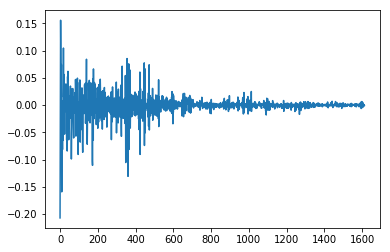

In [42]:
error_prediction = []
for i in np.arange(11,len(df)):
    #i = 11
    L = 10 #window size
    X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
    Y_input = df["value"].values[i-(1+L):i-1].reshape((1,10))
    history = model.fit(X_input,Y_input , nb_epoch=20, verbose=0)
    error_prediction.append((model.predict(X_input)-Y_input)[0][0])
    print(error_prediction[-1])


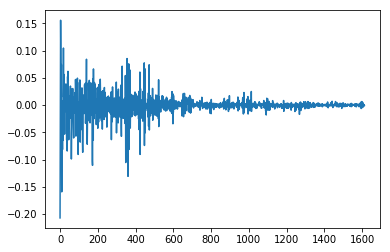

In [43]:
plt.plot(error_prediction)
plt.show()

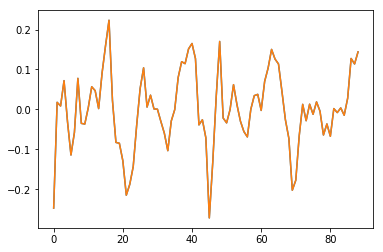